In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import re
from scipy.signal import butter, filtfilt

##### Gathering data

In [ ]:
# Control data
mmmp_dir = './Control'
fma_control = glob(os.path.join(mmmp_dir, '**/StandingUp_Chair_FMA0[0-9]_C[0-9]*.tsv'), recursive=True)


In [ ]:
#PwP data
mmmp_dir = './PWP'
fma_pwp = glob(os.path.join(mmmp_dir, '**/StandingUp_Chair_FMA0[0-9]_P[0-9]*.tsv'), recursive=True)


In [ ]:
# Data passes thorugh low-pass butterworth filter of 4th order
def butter_lowpass_filter(data, cutoff_frequency=10, sampling_rate=100, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data, axis=0, padlen=0)
    return filtered_data

##### Reading file function

In [ ]:
NAN_special = -999999
def read_file(file):
    # Load the motion capture data into a Pandas DataFrame
    df = pd.read_csv(file,sep = '\t',skiprows=11)
    df = df.fillna(NAN_special)
    df.columns = df.columns.str.strip() #eliminating unecesary spaces in column titles
    time =  df.loc[:, "Time"].to_numpy()
    
   
    marker_list = ['RSHO X', 'RSHO Y', 'RSHO Z', 'LSHO X', 'LSHO Y','LSHO Z', 
                   'LFHD X', 'LFHD Y', 'LFHD Z', 'RFHD X', 'RFHD Y', 'RFHD Z',
                   'STRN X', 'STRN Y', 'STRN Z',
                   'LASI X', 'LASI Y', 'LASI Z', 'RASI X', 'RASI Y', 'RASI Z',
                   'LTOE X', 'LTOE Y', 'LTOE Z','RTOE X', 'RTOE Y', 'RTOE Z',
                  'LANK X', 'LANK Y', 'LANK Z','RANK X', 'RANK Y', 'RANK Z',
                  'LHEE X', 'LHEE Y', 'LHEE Z','RHEE X', 'RHEE Y', 'RHEE Z',
                  'LKNE X', 'LKNE Y', 'LKNE Z','RKNE X', 'RKNE Y', 'RKNE Z']

    # create empty arrays for each marker
    RSHO = np.zeros((len(time), 3))
    LSHO = np.zeros((len(time), 3))
    LSTC = np.zeros((len(time), 3))
    RBAK = np.zeros((len(time), 3))
    LFHD = np.zeros((len(time), 3))
    RFHD = np.zeros((len(time), 3))
    LBHD = np.zeros((len(time), 3))
    RBHD = np.zeros((len(time), 3))
    STRN = np.zeros((len(time), 3))
    LASI = np.zeros((len(time), 3))
    RASI = np.zeros((len(time), 3))
    LPSI = np.zeros((len(time), 3))
    RPSI = np.zeros((len(time), 3))
    RTOE = np.zeros((len(time), 3))
    LTOE = np.zeros((len(time), 3))
    LANK = np.zeros((len(time), 3))
    RANK = np.zeros((len(time), 3))
    LHEE = np.zeros((len(time), 3))
    RHEE = np.zeros((len(time), 3))
    LKNE = np.zeros((len(time), 3))
    RKNE = np.zeros((len(time), 3))
    
    flag = False # this flag will help us identify the files that are incomplete later 
    missing_markers = [] # this is a list to collect the missing markers in the file
    
    for col_name in marker_list:
        if col_name in df.columns:
            
            if col_name.startswith('RSHO'):
                RSHO = df.loc[:, ['RSHO X', 'RSHO Y', 'RSHO Z']].to_numpy()
                RSHO = butter_lowpass_filter(RSHO)
            elif col_name.startswith('LSHO'):
                LSHO = df.loc[:, ['LSHO X', 'LSHO Y', 'LSHO Z']].to_numpy()
                LSHO = butter_lowpass_filter(LSHO)
            elif col_name.startswith('LFHD'):
                LFHD = df.loc[:, ['LFHD X', 'LFHD Y', 'LFHD Z']].to_numpy()
                LFHD = butter_lowpass_filter(LFHD)
            elif col_name.startswith('RFHD'):
                RFHD = df.loc[:, ['RFHD X', 'RFHD Y', 'RFHD Z']].to_numpy()
                RFHD = butter_lowpass_filter(RFHD)
            elif col_name.startswith('STRN'):
                STRN = df.loc[:, ['STRN X', 'STRN Y', 'STRN Z']].to_numpy()
                STRN = butter_lowpass_filter(STRN)
            elif col_name.startswith('LASI'):
                LASI = df.loc[:, ['LASI X', 'LASI Y', 'LASI Z']].to_numpy()
                LASI = butter_lowpass_filter(LASI)
            elif col_name.startswith('RASI'):
                RASI = df.loc[:, ['RASI X', 'RASI Y', 'RASI Z']].to_numpy()
                RASI = butter_lowpass_filter(RASI)
            elif col_name.startswith('RTOE'):
                RTOE = df.loc[:, ['RTOE X', 'RTOE Y', 'RTOE Z']].to_numpy()
                RTOE = butter_lowpass_filter(RTOE)
            elif col_name.startswith('LTOE'):
                LTOE = df.loc[:, ['LTOE X', 'LTOE Y', 'LTOE Z']].to_numpy()
                LTOE = butter_lowpass_filter(LTOE)
            elif col_name.startswith('LANK'):
                LANK = df.loc[:, ['LANK X', 'LANK Y', 'LANK Z']].to_numpy()
                LANK = butter_lowpass_filter(LANK)
            elif col_name.startswith('RANK'):
                RANK = df.loc[:, ['RANK X', 'RANK Y', 'RANK Z']].to_numpy()
                RANK = butter_lowpass_filter(RANK)
            elif col_name.startswith('LHEE'):
                LHEE = df.loc[:, ['LHEE X', 'LHEE Y', 'LHEE Z']].to_numpy()
                LHEE = butter_lowpass_filter(LHEE)
            elif col_name.startswith('RHEE'):
                RHEE = df.loc[:, ['RHEE X', 'RHEE Y', 'RHEE Z']].to_numpy()
                RHEE = butter_lowpass_filter(RHEE)
            elif col_name.startswith('LKNE'):
                LKNE = df.loc[:, ['LKNE X', 'LKNE Y', 'LKNE Z']].to_numpy()
                LKNE = butter_lowpass_filter(LKNE)
            elif col_name.startswith('RKNE'):
                RKNE = df.loc[:, ['RKNE X', 'RKNE Y', 'RKNE Z']].to_numpy()
                RKNE = butter_lowpass_filter(RKNE)
        else:
            flag = True
            missing_markers.append(col_name)
#             print('File: {} , does not have marker {}'.format(file, col_name))
    print(file,missing_markers)
    return flag,missing_markers,time,LFHD,RFHD,LBHD,RBHD,RSHO,LSHO,LSTC,RBAK,STRN,LASI,RASI,LPSI,RPSI,RTOE,LTOE,LANK,RANK,LHEE,RHEE,LKNE,RKNE

## Peak AP  inclination angle (yz plane)

In [ ]:
flag,missing_markers,time,LFHD,RFHD,LBHD,RBHD,RSHO,LSHO,LSTC,RBAK,STRN,LASI,RASI,LPSI,RPSI,RTOE,LTOE,LANK,RANK,LHEE,RHEE,LKNE,RKNE = read_file(fma_control[24])


In [ ]:
def calculate_peak_AP_inclination(left_shoulder,right_shoulder,sternum):
    """
    Calculate the peak anterior-posterior (AP) inclination of the trunk based on the position of shoulder and sternum markers.

    Parameters:
    - left_shoulder (numpy.ndarray): Position vector representing the left shoulder marker.
    - right_shoulder (numpy.ndarray): Position vector representing the right shoulder marker.
    - sternum (numpy.ndarray): Position vector representing the sternum marker.

    Returns:
    - float: The peak AP inclination angle in degrees.
    """
    # Normalize positions by subtracting initial positions
#     left_shoulder_rel = left_shoulder - left_shoulder[0]
#     right_shoulder_rel = right_shoulder - right_shoulder[0]
#     sternum_rel = sternum - sternum[0]
    
    # Calculate the trunk position based on relative positions
    trunk = (left_shoulder + right_shoulder + sternum) / 3
#     print(trunk)
        # Calculate the inclination angle with respect to the yz plane for each vector
    inclination_angle = np.arctan2(trunk[:, 2], trunk[:, 1])

    # Adjust the angle to be positive in the yz plane for each vector. 90 degrees are removed from the calculation to obtain the
    # angle wrt to the z axis. 
    #the closer the angle to 90 the closer the trunk to the z axis 
    
#     inclination_angle_degrees = np.where(inclination_angle < 0,
#                                          90 - abs(np.degrees(inclination_angle)),
#                                          90 - np.degrees(inclination_angle))
    inclination_angle_degrees = np.degrees(inclination_angle)


    inclination_angle_degrees = 180-inclination_angle_degrees
    peak_AP_inclination = max(inclination_angle_degrees)
    
    
    return peak_AP_inclination #,inclination_angle_degrees



# peak_inclination,inclination_angle_degrees = calculate_peak_AP_inclination(LSHO,RSHO,STRN)
# print(peak_inclination)
# plt.plot(time,inclination_angle_degrees)

## Peak ML inclination angle (xz plane)

    The peak ML inclination is calculated with the xz coordiantes of the sternum marker. The max inclination represents the max deviation of the sternum in the frontal plane from its initial position at the start of the turn. 

In [ ]:
def calculate_peak_ML_inclination(left_shoulder,right_shoulder,sternum):
    """
    Calculate the peak medial-lateral (ML) inclination of the trunk based on the position of shoulder and sternum markers.

    Parameters:
    - left_shoulder (numpy.ndarray): Position vector representing the left shoulder marker.
    - right_shoulder (numpy.ndarray): Position vector representing the right shoulder marker.
    - sternum (numpy.ndarray): Position vector representing the sternum marker.

    Returns:
    - float: The peak ML inclination angle in degrees.
    """
    # Normalize positions by subtracting initial positions
#     left_shoulder_rel = left_shoulder - left_shoulder[0]
#     right_shoulder_rel = right_shoulder - right_shoulder[0]
#     sternum_rel = sternum - sternum[0]
    
    # Calculate the trunk position based on relative positions
    trunk = (left_shoulder + right_shoulder + sternum) / 3

        # Calculate the inclination angle along the xz plane for each vector
    inclination_angle = np.arctan2(trunk[:, 2], trunk[:, 0])

    # Adjust the angle to be positive in the yz plane for each vector. 90 degrees are removed from the calculation to obtain the
    # angle wrt to the z axis. 
#     inclination_angle_degrees = np.where(inclination_angle < 0,
#                                          90 - abs(np.degrees(inclination_angle)),
#                                          90 - np.degrees(inclination_angle))
    inclination_angle_degrees = np.degrees(inclination_angle)
    inclination_angle_degrees -= inclination_angle_degrees[0]
    peak_ML_inclination = max(np.abs(inclination_angle_degrees))
#     peak_ML_inclination = np.abs(inclination_angle_degrees))
#     
    return peak_ML_inclination# ,inclination_angle_degrees

peak_ML_inclination = calculate_peak_ML_inclination(LSHO,RSHO,STRN)
# plt.plot(time,inclination_angle_degrees)
print(peak_ML_inclination)
# plt.plot(time,inclination_angle_degrees)


## RMS of trunk acceleration 

Calculation method from Palmieri et al. 2013

In [ ]:
def calculate_acc_rms(left_shoulder, right_shoulder, sternum, time):
    """
    Calculate the root mean square (RMS) of the trunk acceleration based on the position of shoulder and sternum markers.

    Parameters:
    - left_shoulder (numpy.ndarray): Position vector representing the left shoulder marker (N_samples x 3).
    - right_shoulder (numpy.ndarray): Position vector representing the right shoulder marker (N_samples x 3).
    - sternum (numpy.ndarray): Position vector representing the sternum marker (N_samples x 3).
    - time (numpy.ndarray): Time vector (N_samples).

    Returns:
    - float: The RMS of the trunk acceleration.
    - numpy.ndarray: Magnitudes of the trunk acceleration at each time step.
    """
    # Normalize positions by subtracting initial positions
    left_shoulder_rel = left_shoulder - left_shoulder[0]
    right_shoulder_rel = right_shoulder - right_shoulder[0]
    sternum_rel = sternum - sternum[0]
    
    # Calculate the trunk position based on relative positions
    trunk = (left_shoulder_rel + right_shoulder_rel + sternum_rel) / 3
#     print("time shape:", time.shape)
    # Calculate the trunk velocity
    trunk_3Dvel = (np.diff(trunk, axis=0) / np.diff(time)[:, np.newaxis] )/1000

    # Compute 3D acceleration
    
    trunk_3Dacc = np.diff(trunk_3Dvel, axis=0) / np.diff(time[1:])[:, np.newaxis] 

    # Calculate magnitude of acceleration
    mag_acc = np.linalg.norm(trunk_3Dacc, axis=1)
    
    # Calculate RMS of acceleration
    acc_rms = np.sqrt(np.mean(mag_acc**2))
    
    return acc_rms#, mag_acc  # Return RMS and magnitudes

In [ ]:
acc_rms,mag_acc = calculate_acc_rms(LSHO,RSHO,STRN,time)

plt.title('STRN acc and RMS value')
plt.plot(time[:-2],mag_acc, label = 'acc',color='b')
plt.axhline(acc_rms, label = 'rms acc',color='r')
plt.axhline(np.mean(mag_acc), label = 'rms acc',color='g')

plt.legend()

In [ ]:
# acc_rms,mag_acc

## Mean trunk jerk

In [ ]:
def calculate_trunk_jerk(left_shoulder,right_shoulder,sternum,time):
    """
    Calculate the mean jerk of the trunk based on the position of shoulder and sternum markers.

    Parameters:
    - left_shoulder (numpy.ndarray): Position vector representing the left shoulder marker.
    - right_shoulder (numpy.ndarray): Position vector representing the right shoulder marker.
    - sternum (numpy.ndarray): Position vector representing the sternum marker.

    Returns:
    - float: The mean jerk of the trunk.
    """
    # Normalize positions by subtracting initial positions
    left_shoulder_rel = left_shoulder - left_shoulder[0]
    right_shoulder_rel = right_shoulder - right_shoulder[0]
    sternum_rel = sternum - sternum[0]
        
    trunk = (left_shoulder_rel + right_shoulder_rel + sternum_rel) / 3

    # Calculate the trunk velocity
    trunk_3Dvel = (np.diff(trunk, axis=0) / np.diff(time)[:, np.newaxis]) /1000
    # Compute 3D acceleration
    trunk_3Dacc = np.diff(trunk_3Dvel, axis=0) / np.diff(time[1:])[:, np.newaxis]  
    # Compute 3D jerk 
    trunk_3Djerk = np.diff(trunk_3Dacc, axis=0) / np.diff(time[2:])[:, np.newaxis]  

    mean_trunk_jerk = np.mean(trunk_3Djerk)
    return mean_trunk_jerk#single value

mean_jerk = calculate_trunk_jerk(LSHO,RSHO,STRN,time)


## Peak trunk velocity 

In [ ]:
def calculate_3d_peak_velocity(left_shoulder,right_shoulder,sternum,time):
    """
    Calculate the peak velocity of the trunk based on the position of shoulder and sternum markers.

    Parameters:
    - left_shoulder (numpy.ndarray): Position vector representing the left shoulder marker.
    - right_shoulder (numpy.ndarray): Position vector representing the right shoulder marker.
    - sternum (numpy.ndarray): Position vector representing the sternum marker.

    Returns:
    - float: The peak velocity of the trunk in mm/s.
    """
    # Normalize positions by subtracting initial positions
    left_shoulder_rel = left_shoulder - left_shoulder[0]
    right_shoulder_rel = right_shoulder - right_shoulder[0]
    sternum_rel = sternum - sternum[0]
        
    trunk = (left_shoulder_rel + right_shoulder_rel + sternum_rel) / 3
    
    # Calculate the trunk velocity
    trunk_3Dvel = np.diff(trunk, axis=0) / np.diff(time)[:, np.newaxis] 
    
    # Calculate magnitude of velocity
    mag_vel = np.linalg.norm(trunk_3Dvel, axis=1)

    # Find the peak velocity
    peak_velocity = np.max(mag_vel)/1000
    
    return peak_velocity

peak_velocity_3d = calculate_3d_peak_velocity(LSHO,RSHO,STRN,time)
print("3D Peak velocity:", peak_velocity_3d,'m/s')


## Peak flexion angle of pelvis

Peak flexion angle of the pelvis, will be the min angle formed between the trunk-pelvis and trunk-knees vector.

The flexion angle is calculated as the angle between the two 3D vectors:
$$\alpha=\arccos \left(\frac{\boldsymbol{a} \cdot \boldsymbol{b}}{|\boldsymbol{a}||\boldsymbol{b}|}\right)$$

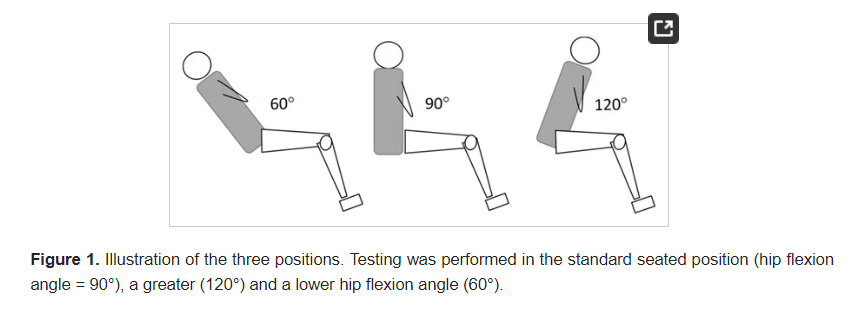
Img ref. Kellis et al., 2019 Effect of Hip Flexion Angle on the Hamstring to Quadriceps Strength Ratio

In [ ]:
def calculate_pelvis_flexion_angle(left_pelvis, right_pelvis, sternum, left_knee, right_knee):
    """
    Calculate the average angle of pelvis flexion based on the position of pelvic markers, sternum marker, and knee markers.

    Parameters:
    - left_pelvis (numpy.ndarray): Position vector representing the left pelvis marker.
    - right_pelvis (numpy.ndarray): Position vector representing the right pelvis marker.
    - sternum (numpy.ndarray): Position vector representing the sternum marker.
    - left_knee (numpy.ndarray): Position vector representing the left knee marker.
    - right_knee (numpy.ndarray): Position vector representing the right knee marker.

    Returns:
    - float: The average angle of pelvis flexion, in degrees.
    """
    
    hip_sternum_vec1 = sternum - left_pelvis
    hip_sternum_vec2 = sternum - right_pelvis

    
    hip_knee_vec1 = left_knee - left_pelvis
    hip_knee_vec2 = right_knee - right_pelvis

    
    dot_product1 = np.sum(hip_sternum_vec1 * hip_knee_vec1, axis=1)
    dot_product2 = np.sum(hip_sternum_vec2 * hip_knee_vec2, axis=1)

    norm1 = np.linalg.norm(hip_sternum_vec1, axis=1) * np.linalg.norm(hip_knee_vec1, axis=1)
    norm2 = np.linalg.norm(hip_sternum_vec2, axis=1) * np.linalg.norm(hip_knee_vec2, axis=1)

  
    cos_angle1 = np.clip(dot_product1 / norm1, -1.0, 1.0)
    cos_angle2 = np.clip(dot_product2 / norm2, -1.0, 1.0)

    angle1 = np.arccos(cos_angle1)
    angle2 = np.arccos(cos_angle2)

   
    angle_degrees1 = 180-np.degrees(angle1)
    angle_degrees2 = 180-np.degrees(angle2)
    
    avg_angle = np.mean([angle_degrees1, angle_degrees2],axis=0)

#     print(avg_angle)
#     plt.plot(avg_angle)
    return np.max(avg_angle)#,avg_angle




## Mean Peak flexion angle of knees

Peak flexion angle of the knees, will be the min angle formed between the knee-pelvis and knee-heel vector. 

The flexion angle is calculated as the angle between the two 3D vectors:
$$\alpha=\arccos \left(\frac{\boldsymbol{a} \cdot \boldsymbol{b}}{|\boldsymbol{a}||\boldsymbol{b}|}\right)$$

The smaller the angle the higher the flexion


In [ ]:
def calculate_knee_flexion_angle(left_pelvis, right_pelvis, left_knee, right_knee,left_heel,right_heel):
    """
    Calculate the average angle of knee flexion based on the position of pelvic markers, knee markers, and heel markers.

    Parameters:
    - left_pelvis (numpy.ndarray): Position vector representing the left pelvis marker.
    - right_pelvis (numpy.ndarray): Position vector representing the right pelvis marker.
    - left_knee (numpy.ndarray): Position vector representing the left knee marker.
    - right_knee (numpy.ndarray): Position vector representing the right knee marker.
    - left_heel (numpy.ndarray): Position vector representing the left heel marker.
    - right_heel (numpy.ndarray): Position vector representing the right heel marker.

    Returns:
    - float: The average angle of knee flexion, in degrees.
    """
    
    hip_knee_vec1 = left_pelvis - left_knee
    hip_knee_vec2 = right_pelvis - right_knee
    
    knee_heel_vec1 = left_heel - left_knee
    knee_heel_vec2 = right_heel - right_knee

    
    dot_product1 = np.sum(knee_heel_vec1 * hip_knee_vec1, axis=1)
    dot_product2 = np.sum(knee_heel_vec2 * hip_knee_vec2, axis=1)

  
    norm1 = np.linalg.norm(knee_heel_vec1, axis=1) * np.linalg.norm(hip_knee_vec1, axis=1)
    norm2 =  np.linalg.norm(knee_heel_vec2, axis=1) * np.linalg.norm(hip_knee_vec2, axis=1)


    cos_angle1 = np.clip(dot_product1 / norm1, -1.0, 1.0)
    cos_angle2 = np.clip(dot_product2 / norm2, -1.0, 1.0)

    angle1 = np.arccos(cos_angle1)
    angle2 = np.arccos(cos_angle2)

#     angle1 -= angle1[0]
#     angle2 -= angle2[0]
    
    angle_degrees1 = np.degrees(angle1)
    angle_degrees2 = np.degrees(angle2)
    

    avg_angle = np.mean([angle_degrees1, angle_degrees2],axis=0)  # mean angle (of left, right side)
#     plt.plot(avg_angle)

    return np.min(avg_angle)

angle = calculate_knee_flexion_angle(LASI, RASI,LKNE, RKNE,LHEE,RHEE)
print(angle)
# plt.plot(angle)
#

## Storing data

In [ ]:
#Create the dataframes to store parameters
df_stand_chair = pd.DataFrame(columns=['Subject ID','Group','TrialFMA',
                                   'Peak_ML_Inclination[deg]','Peak_AP_Inclination[deg]',
                                       'Acc_RMS','Peak_trunk_vel[m/s]','Mean_trunk_jerk[m/s3]',
                                        'Max_pelvis_flexion[deg]','Max_knee_flexion[deg]'])

full_data = [fma_control,fma_pwp]
data_label = ['Control','PwP']

for i,group in enumerate(full_data):
    type_subject = data_label[i]
    for file in group:
                
       # Extract subject ID
        if type_subject == 'Control':
            subject_id = re.search(r'_C(\d+)\.tsv$', file).group(1)
            subject_id = 'C'+subject_id
            color = 'blue'
        else: 
            subject_id = re.search(r'_P(\d+)\.tsv$', file).group(1)
            subject_id = 'P'+subject_id


        # Extract trial ID
        trial = re.search(r'_FMA0(\d+)_', file).group(1)
        
        flag,missing_markers,time,LFHD,RFHD,LBHD,RBHD,RSHO,LSHO,LSTC,RBAK,STRN,LASI,RASI,LPSI,RPSI,RTOE,LTOE,LANK,RANK,LHEE,RHEE,LKNE,RKNE = read_file(file)
        
        if any(marker.startswith(('STRN', 'LSHO', 'RSHO')) for marker in missing_markers):
            print(subject_id + "One or more required markers are missing.")
            peak_AP = peak_ML = acc_rms = peak_trunk_velocity = mean_trunk_jerk = np.nan
        else:
            peak_AP = calculate_peak_AP_inclination(LSHO,RSHO,STRN)
            peak_ML = calculate_peak_ML_inclination(LSHO,RSHO,STRN)
            acc_rms = calculate_acc_rms(LSHO,RSHO,STRN,time)
            peak_trunk_velocity = calculate_3d_peak_velocity(LSHO,RSHO,STRN,time)
            mean_trunk_jerk = calculate_trunk_jerk(LSHO,RSHO,STRN,time)

        if any(marker.startswith('LASI') or marker.startswith('RASI') for marker in missing_markers):
            pelvis_flexion_angle = np.nan
        else:
            pelvis_flexion_angle = calculate_pelvis_flexion_angle(LASI, RASI, STRN, LKNE, RKNE)

        if any(marker.startswith('LKNE') or marker.startswith('RKNE') or marker.startswith('LHEE') or marker.startswith('RHEE') for marker in missing_markers):
            knee_flexion_angle = np.nan
        else:
            knee_flexion_angle = calculate_knee_flexion_angle(LASI, RASI, LKNE, RKNE, LHEE, RHEE)

        new_line = {'Subject ID':subject_id,'Group':type_subject,'TrialFMA':trial,
                   'Peak_ML_Inclination[deg]':peak_ML,'Peak_AP_Inclination[deg]':peak_AP,
                   'Acc_RMS':acc_rms,
                   'Peak_trunk_vel[m/s]':peak_trunk_velocity,
                    'Mean_trunk_jerk[m/s3]':mean_trunk_jerk,
                    'Max_pelvis_flexion[deg]':pelvis_flexion_angle,
                    'Max_knee_flexion[deg]':knee_flexion_angle}

            
        df_stand_chair.loc[len(df_stand_chair)] = new_line

In [ ]:
df_stand_chair.tail()